## MNIST

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X,y = mnist['data'],mnist['target']
#train_test_split
X_train = np.array(X[:60000],dtype = float)
y_train = np.array(y[:60000],dtype = float)
X_test = np.array(X[60000:],dtype = float)
y_test = np.array(y[60000:],dtype = float)
y_test.shape,X_train.shape
# 如果样本在同一尺度，不需要归一化

((10000,), (60000, 784))

### KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
%time knn.fit(X_train,y_train)

Wall time: 31.2 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
%time knn.score(X_test,y_test)

Wall time: 14min 27s


0.9688

### 使用PCA降维

In [19]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)
X_train_reduction.shape


(60000, 87)

In [21]:
#使用降维后的数据进行KNN过程
knn = KNeighborsClassifier()
%time knn.fit(X_train_reduction,y_train)

Wall time: 594 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
%time knn.score(X_test_reduction,y_test)

Wall time: 1min 24s


0.9728

##### 识别准确率更高，由此看得出，PCA在图像处理中可以降噪，即降维的时候丢失信息，但是也可能是丢失的噪音

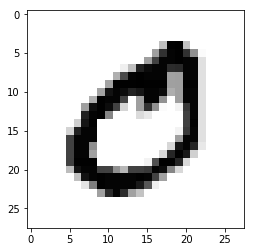

In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt_old = X[i]
show_img = plt_old.reshape(28,28)
plt.imshow(show_img,cmap = mpl.cm.binary)
plt.show()

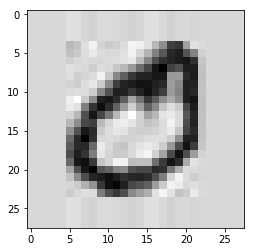

In [40]:
plt_old = plt_digit.reshape(28,28)
pca_test = PCA(0.95)
pca_test.fit(plt_old)
plt_denoise = pca_test.transform(plt_old)
plt_denoise = pca_test.inverse_transform(plt_denoise)
plt.imshow(plt_denoise,cmap = mpl.cm.binary)
plt.show()#....原来的图片没有噪音.好吧..???

### 人脸识别
 把PCA的每一个主成分看作是一个样本，这就是特征脸

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)#取出样本最少有60个图片的人
faces####无法下载数据集。。。。。。。？